In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

In [2]:
df= pd.read_csv("twitter_training.csv")

In [3]:
df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

In [4]:
df_info = df.info()
df_head = df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74681 non-null  int64 
 1   Entity     74681 non-null  object
 2   Sentiment  74681 non-null  object
 3   Text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [5]:
print(df['Sentiment'].value_counts())

Sentiment
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


C:\Users\ARPIT AWASTHI\AppData\Local\Temp\ipykernel_16492\1163762591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette=palette)
C:\Users\ARPIT AWASTHI\AppData\Local\Temp\ipykernel_16492\1163762591.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette=palette)


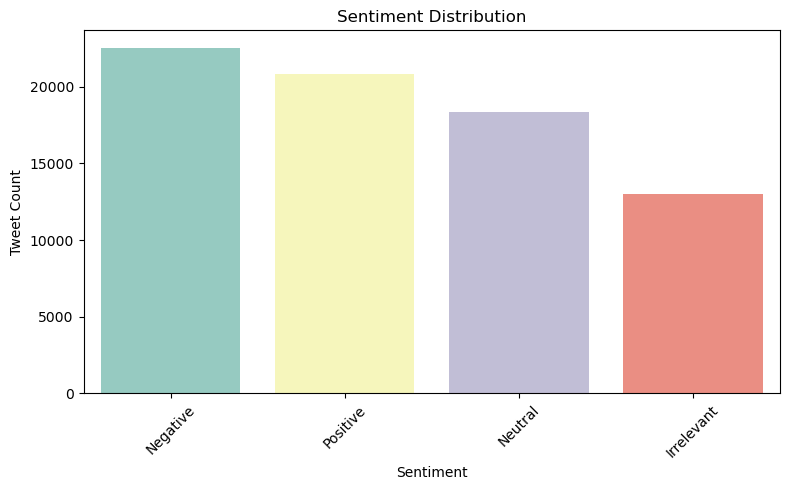

In [7]:
palette = sns.color_palette("Set3", n_colors=10)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sentiment', order=df['Sentiment'].value_counts().index, palette=palette)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


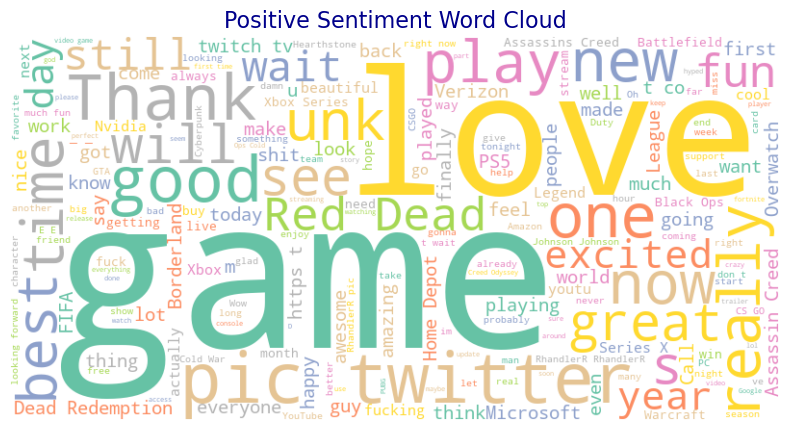

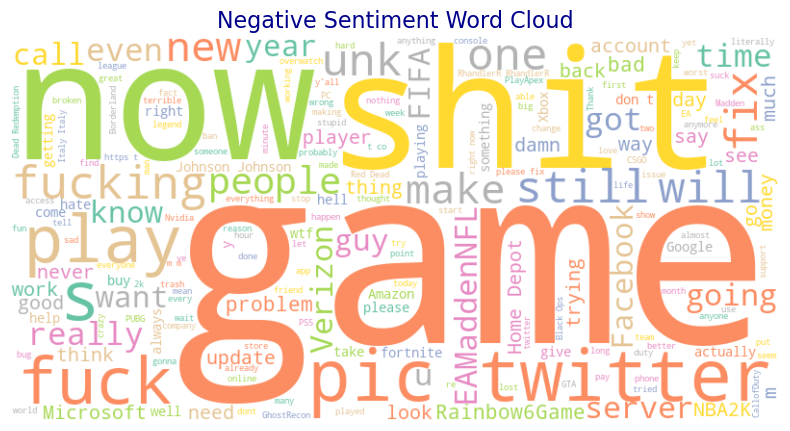

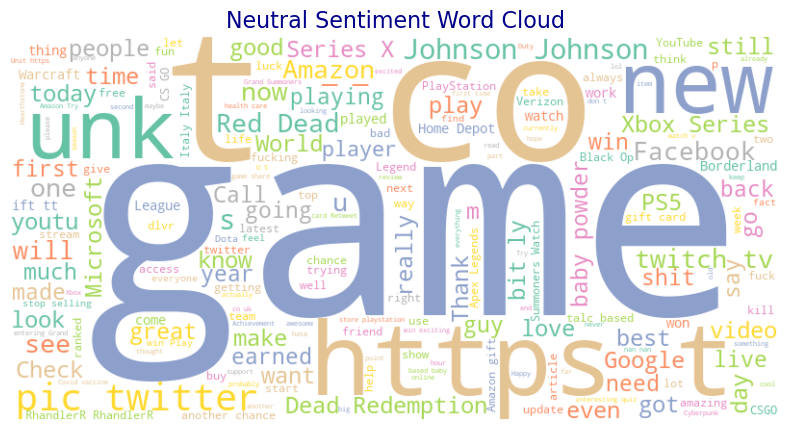

In [6]:
def generate_wordcloud(sentiment):
    text = " ".join(df[df['Sentiment'] == sentiment]['Text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Set2').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment} Sentiment Word Cloud", fontsize=16, color='darkblue')
    plt.show()

# Generate word clouds for each major sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud(sentiment)


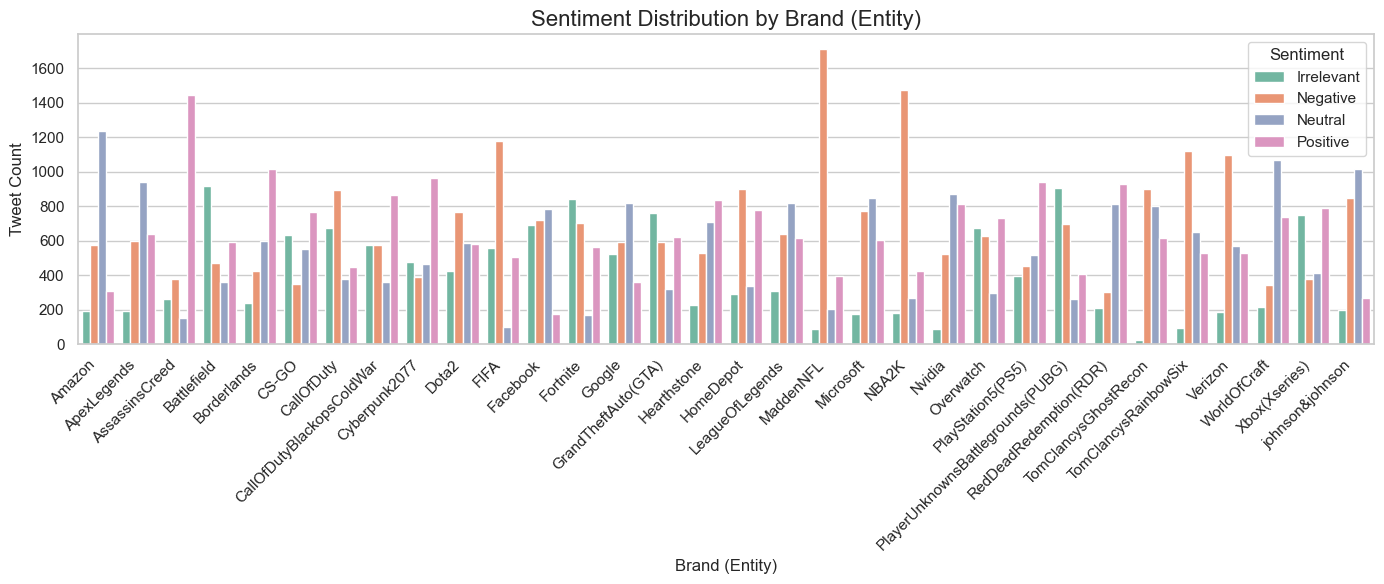

In [19]:
sentiment_by_brand = df.groupby(['Entity', 'Sentiment']).size().reset_index(name='Count')

# Plot
plt.figure(figsize=(14, 6))
sns.set(style='whitegrid')
sns.barplot(data=sentiment_by_brand, x='Entity', y='Count', hue='Sentiment', palette='Set2')

plt.title("Sentiment Distribution by Brand (Entity)", fontsize=16)
plt.xlabel("Brand (Entity)")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

In [39]:
def get_textblob_sentiment(text):
    try:
        analysis = TextBlob(str(text))
        polarity = analysis.sentiment.polarity
        if polarity > 0:
            return 'Positive'
        elif polarity < 0:
            return 'Negative'
        else:
            return 'Neutral'
    except:
        return 'Neutral'

df['Predicted_Sentiment'] = df['Text'].apply(get_textblob_sentiment)


df[['Text', 'Sentiment', 'Predicted_Sentiment']].head(20)

,Text,Sentiment,Predicted_Sentiment
0,I am coming to the borders and I will kill you...,Positive,Neutral
1,im getting on borderlands and i will kill you ...,Positive,Neutral
2,im coming on borderlands and i will murder you...,Positive,Neutral
3,im getting on borderlands 2 and i will murder ...,Positive,Neutral
4,im getting into borderlands and i can murder y...,Positive,Neutral
5,So I spent a few hours making something for fu...,Positive,Positive
6,So I spent a couple of hours doing something f...,Positive,Positive
7,So I spent a few hours doing something for fun...,Positive,Positive
8,So I spent a few hours making something for fu...,Positive,Positive
9,2010 So I spent a few hours making something f...,Positive,Positive
